In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D


In [3]:
file_path = 'atp_australian_open_20242024_MS701_ball_trajectory.csv'
pbp_file_path = 'atp_australian_open_2024_2024_MS701_pbp.csv'
rally_data = pd.read_csv(file_path)
pbp_data = pd.read_csv(pbp_file_path)


In [4]:
print("Primeiras linhas de rally_data:")
print(rally_data.head())

print("\nPrimeiras linhas de pbp_data:")
print(pbp_data.head())

print("\nInformações sobre rally_data:")
print(rally_data.info())

print("\nInformações sobre pbp_data:")
print(pbp_data.info())


Primeiras linhas de rally_data:
  point_ID  set_num  game_num  point_num  serve_num  strike_index position  \
0  1_1_1_1        1         1          1          1             1      hit   
1  1_1_1_1        1         1          1          1             1     peak   
2  1_1_1_1        1         1          1          1             1      net   
3  1_1_1_1        1         1          1          1             1   bounce   
4  1_1_1_1        1         1          1          1             1     last   

        x      y      z  
0  11.333  1.109  2.965  
1  11.333  1.109  2.965  
2   0.000 -2.090  1.332  
3  -6.636 -4.089  0.037  
4 -13.902 -6.508  1.072  

Primeiras linhas de pbp_data:
  point_ID  set_num  game_num  point_num  serve_num server_id returner_id  \
0  1_1_1_1        1         1          1          1   ATPS0AG     ATPMM58   
1  1_1_1_2        1         1          1          2   ATPS0AG     ATPMM58   
2  1_1_2_1        1         1          2          1   ATPS0AG     ATPMM58   
3  1

In [5]:
pbp_data

point_ID  set_num  game_num  point_num  serve_num server_id returner_id  \
0    1_1_1_1        1         1          1          1   ATPS0AG     ATPMM58   
1    1_1_1_2        1         1          1          2   ATPS0AG     ATPMM58   
2    1_1_2_1        1         1          2          1   ATPS0AG     ATPMM58   
3    1_1_3_1        1         1          3          1   ATPS0AG     ATPMM58   
4    1_1_4_1        1         1          4          1   ATPS0AG     ATPMM58   
..       ...      ...       ...        ...        ...       ...         ...   
378  5_9_3_1        5         9          3          1   ATPS0AG     ATPMM58   
379  5_9_3_2        5         9          3          2   ATPS0AG     ATPMM58   
380  5_9_4_1        5         9          4          1   ATPS0AG     ATPMM58   
381  5_9_5_1        5         9          5          1   ATPS0AG     ATPMM58   
382  5_9_6_1        5         9          6          1   ATPS0AG     ATPMM58   

    point_winner_id  court_side serve_speed_kph  ... is_prev_doublefault  \
0               NaN  DeuceCourt      140.38 KPH  ...                   0   
1           ATPMM58  DeuceCourt         158 KPH  ...                   0   
2           ATPS0AG     AdCourt         196 KPH  ...                   0   
3           ATPS0AG  DeuceCourt         201 KPH  ...                   0   
4           ATPS0AG     AdCourt      199.06 KPH  ...                   0   
..              ...         ...             ...  ...                 ...   
378         ATPS0AG  DeuceCourt      190.12 KPH  ...                   0   
379         ATPMM58  DeuceCourt         158 KPH  ...                   0   
380         ATPMM58     AdCourt         201 KPH  ...                   0   
381         ATPS0AG  DeuceCourt         205 KPH  ...                   0   
382         ATPS0AG     AdCourt         204 KPH  ...                   0   

    is_prev_ace  server_score  returner_score  player1  player2 p1_cum_games  \
0             0             0               0  ATPS0AG  ATPMM58            0   
1             0             0               0  ATPS0AG  ATPMM58            0   
2             0             0               1  ATPS0AG  ATPMM58            0   
3             0             1               1  ATPS0AG  ATPMM58            0   
4             0             2               1  ATPS0AG  ATPMM58            0   
..          ...           ...             ...      ...      ...          ...   
378           0             2               0  ATPS0AG  ATPMM58            5   
379           0             2               0  ATPS0AG  ATPMM58            5   
380           0             2               1  ATPS0AG  ATPMM58            5   
381           0             2               2  ATPS0AG  ATPMM58            5   
382           0             3               2  ATPS0AG  ATPMM58            5   

    p2_cum_games  p1_cum_sets p2_cum_sets  
0              0            0           0  
1              0            0           0  
2              0            0           0  
3              0            0           0  
4              0            0           0  
..           ...          ...         ...  
378            3            2           2  
379            3            2           2  
380            3            2           2  
381            3            2           2  
382            3            2           2  

[383 rows x 64 columns]

In [6]:
rally_data

point_ID  set_num  game_num  point_num  serve_num  strike_index position  \
0     1_1_1_1        1         1          1          1             1      hit   
1     1_1_1_1        1         1          1          1             1     peak   
2     1_1_1_1        1         1          1          1             1      net   
3     1_1_1_1        1         1          1          1             1   bounce   
4     1_1_1_1        1         1          1          1             1     last   
...       ...      ...       ...        ...        ...           ...      ...   
9242  5_9_6_1        5         9          6          1             9      hit   
9243  5_9_6_1        5         9          6          1             9     peak   
9244  5_9_6_1        5         9          6          1             9      net   
9245  5_9_6_1        5         9          6          1             9   bounce   
9246  5_9_6_1        5         9          6          1             9     last   

           x      y      z  
0     11.333  1.109  2.965  
1     11.333  1.109  2.965  
2      0.000 -2.090  1.332  
3     -6.636 -4.089  0.037  
4    -13.902 -6.508  1.072  
...      ...    ...    ...  
9242  12.073  5.028  1.291  
9243   4.275  4.404  1.572  
9244   0.000  4.099  1.471  
9245 -11.169  3.481  0.035  
9246 -17.266  3.172  0.861  

[9247 rows x 10 columns]

In [7]:
# Merge the two dataframes on the point_ID
rally_data_merged = rally_data.merge(pbp_data, on='point_ID')

print(rally_data_merged.describe())

# print(rally_data_merged.corr())

# sns.pairplot(pbp_data.head(), diag_kind='hist')
# plt.show()





         set_num_x   game_num_x  point_num_x  serve_num_x  strike_index  \
count  9247.000000  9247.000000  9247.000000  9247.000000   9247.000000   
mean      3.057965     5.241484     4.005407     1.436466      5.970693   
std       1.353205     2.895725     2.529380     0.495974      5.713726   
min       1.000000     1.000000     1.000000     1.000000      1.000000   
25%       2.000000     2.000000     2.000000     1.000000      2.000000   
50%       3.000000     5.000000     4.000000     1.000000      4.000000   
75%       4.000000     8.000000     5.000000     2.000000      8.000000   
max       5.000000    10.000000    16.000000     2.000000     40.000000   

                 x            y            z    set_num_y   game_num_y  ...  \
count  9247.000000  9247.000000  9247.000000  9247.000000  9247.000000  ...   
mean      0.052683     0.058991     1.207442     3.057965     5.241484  ...   
std       9.239727     2.455622     0.906712     1.353205     2.895725  ...   
min     

In [8]:
# informações básicas sobre os dataframes
print("Informações sobre rally_data:")
print(rally_data.info())

print("\nInformações sobre pbp_data:")
print(pbp_data.info())

Informações sobre rally_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9247 entries, 0 to 9246
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   point_ID      9247 non-null   object 
 1   set_num       9247 non-null   int64  
 2   game_num      9247 non-null   int64  
 3   point_num     9247 non-null   int64  
 4   serve_num     9247 non-null   int64  
 5   strike_index  9247 non-null   int64  
 6   position      9247 non-null   object 
 7   x             9247 non-null   float64
 8   y             9247 non-null   float64
 9   z             9247 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 722.5+ KB
None

Informações sobre pbp_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   point_ID                  383

     point_ID  set_num_x  game_num_x  point_num_x  serve_num_x  strike_index  \
0     1_1_1_1          1           1            1            1             1   
1     1_1_1_1          1           1            1            1             1   
2     1_1_1_1          1           1            1            1             1   
3     1_1_1_1          1           1            1            1             1   
4     1_1_1_1          1           1            1            1             1   
...       ...        ...         ...          ...          ...           ...   
9242  5_9_6_1          5           9            6            1             9   
9243  5_9_6_1          5           9            6            1             9   
9244  5_9_6_1          5           9            6            1             9   
9245  5_9_6_1          5           9            6            1             9   
9246  5_9_6_1          5           9            6            1             9   

     position       x      y      z  ..

<Figure size 1500x1000 with 0 Axes>

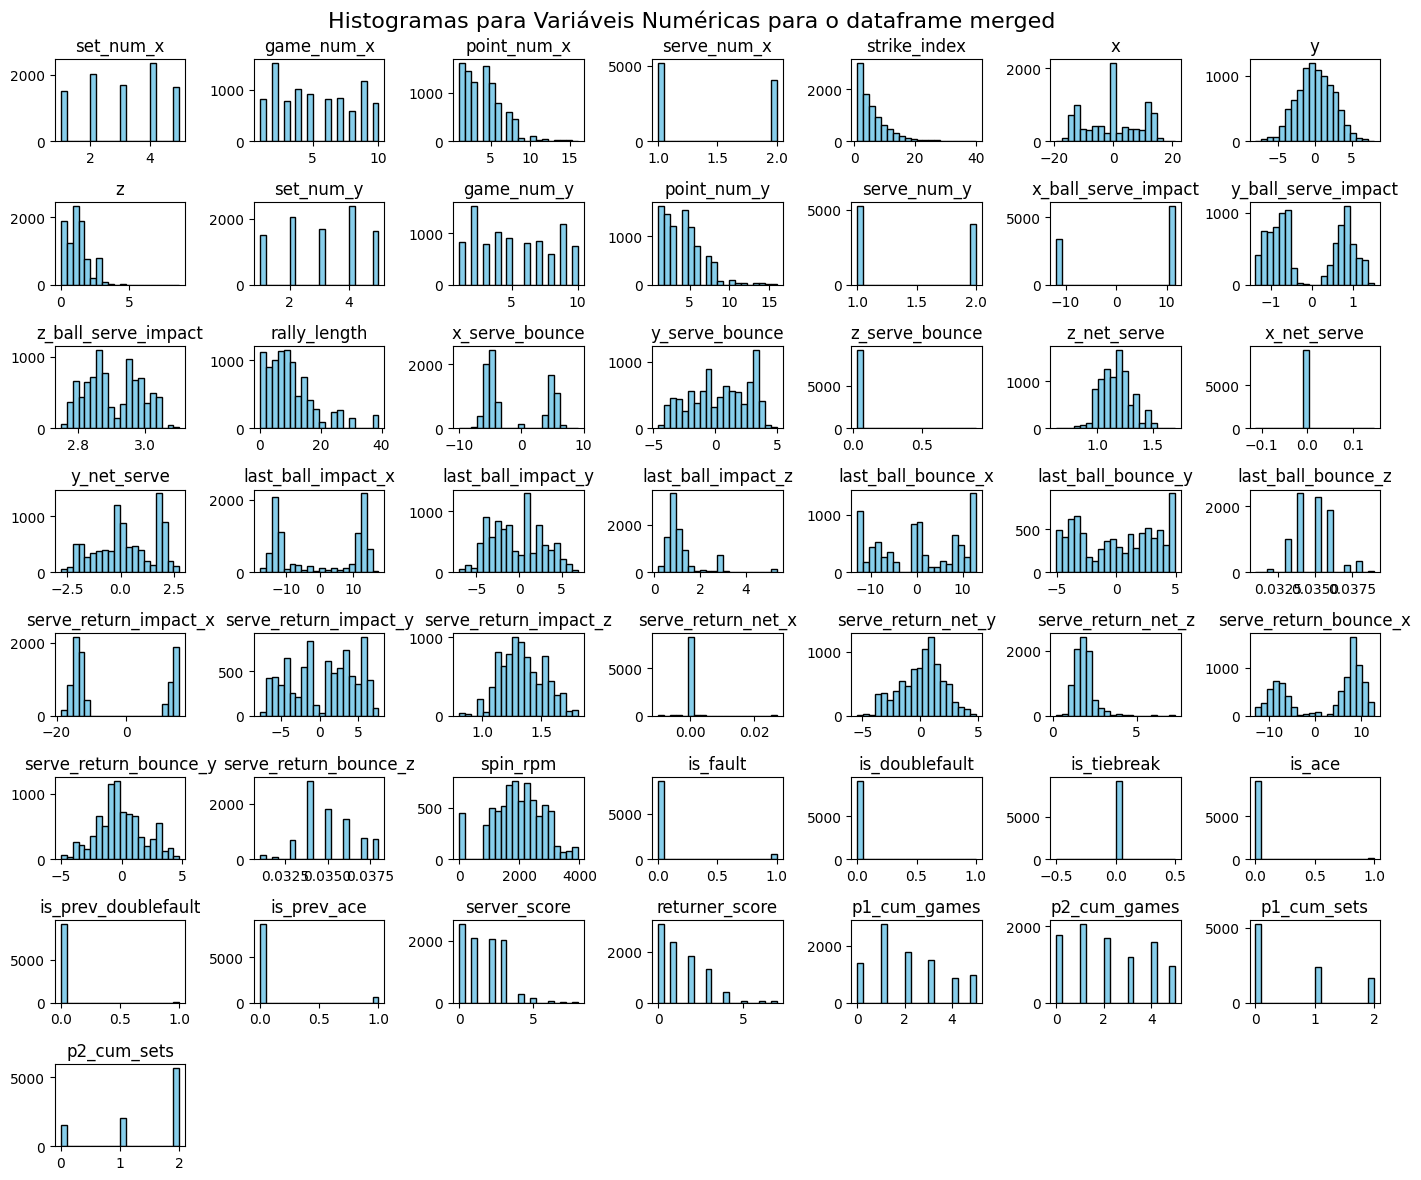

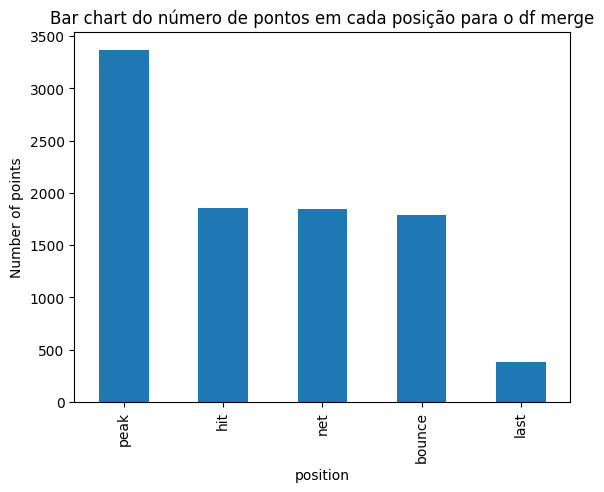

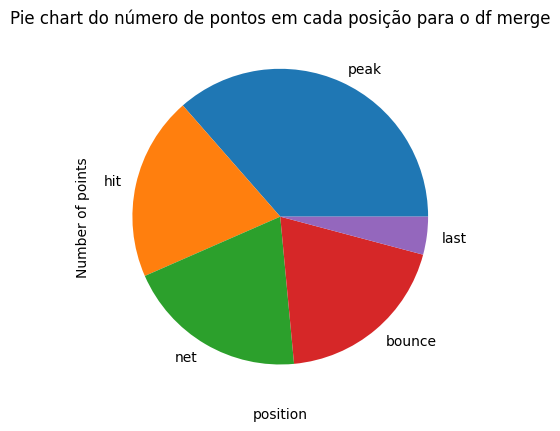

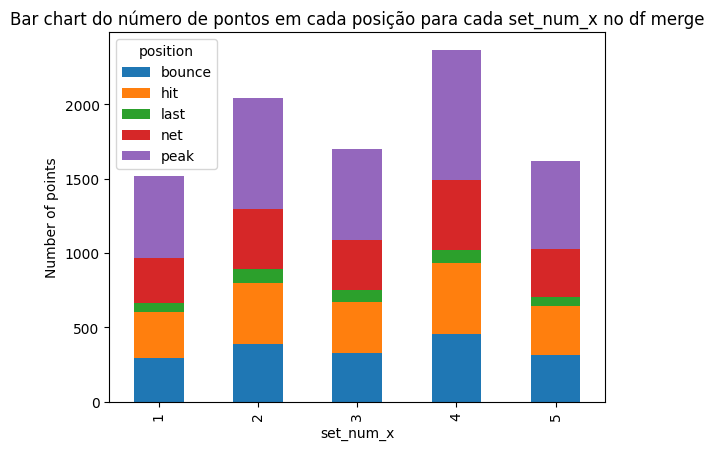

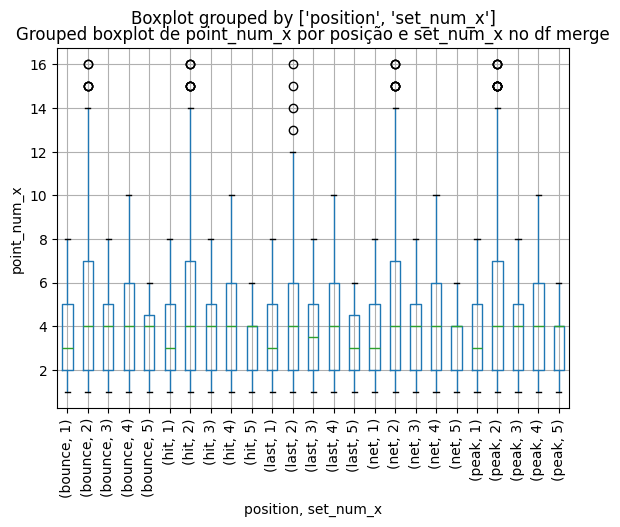

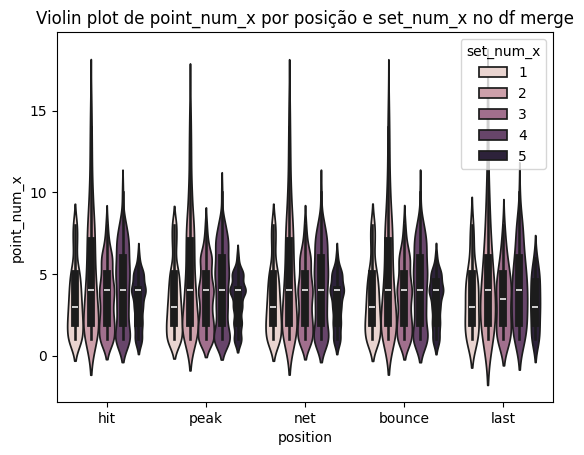

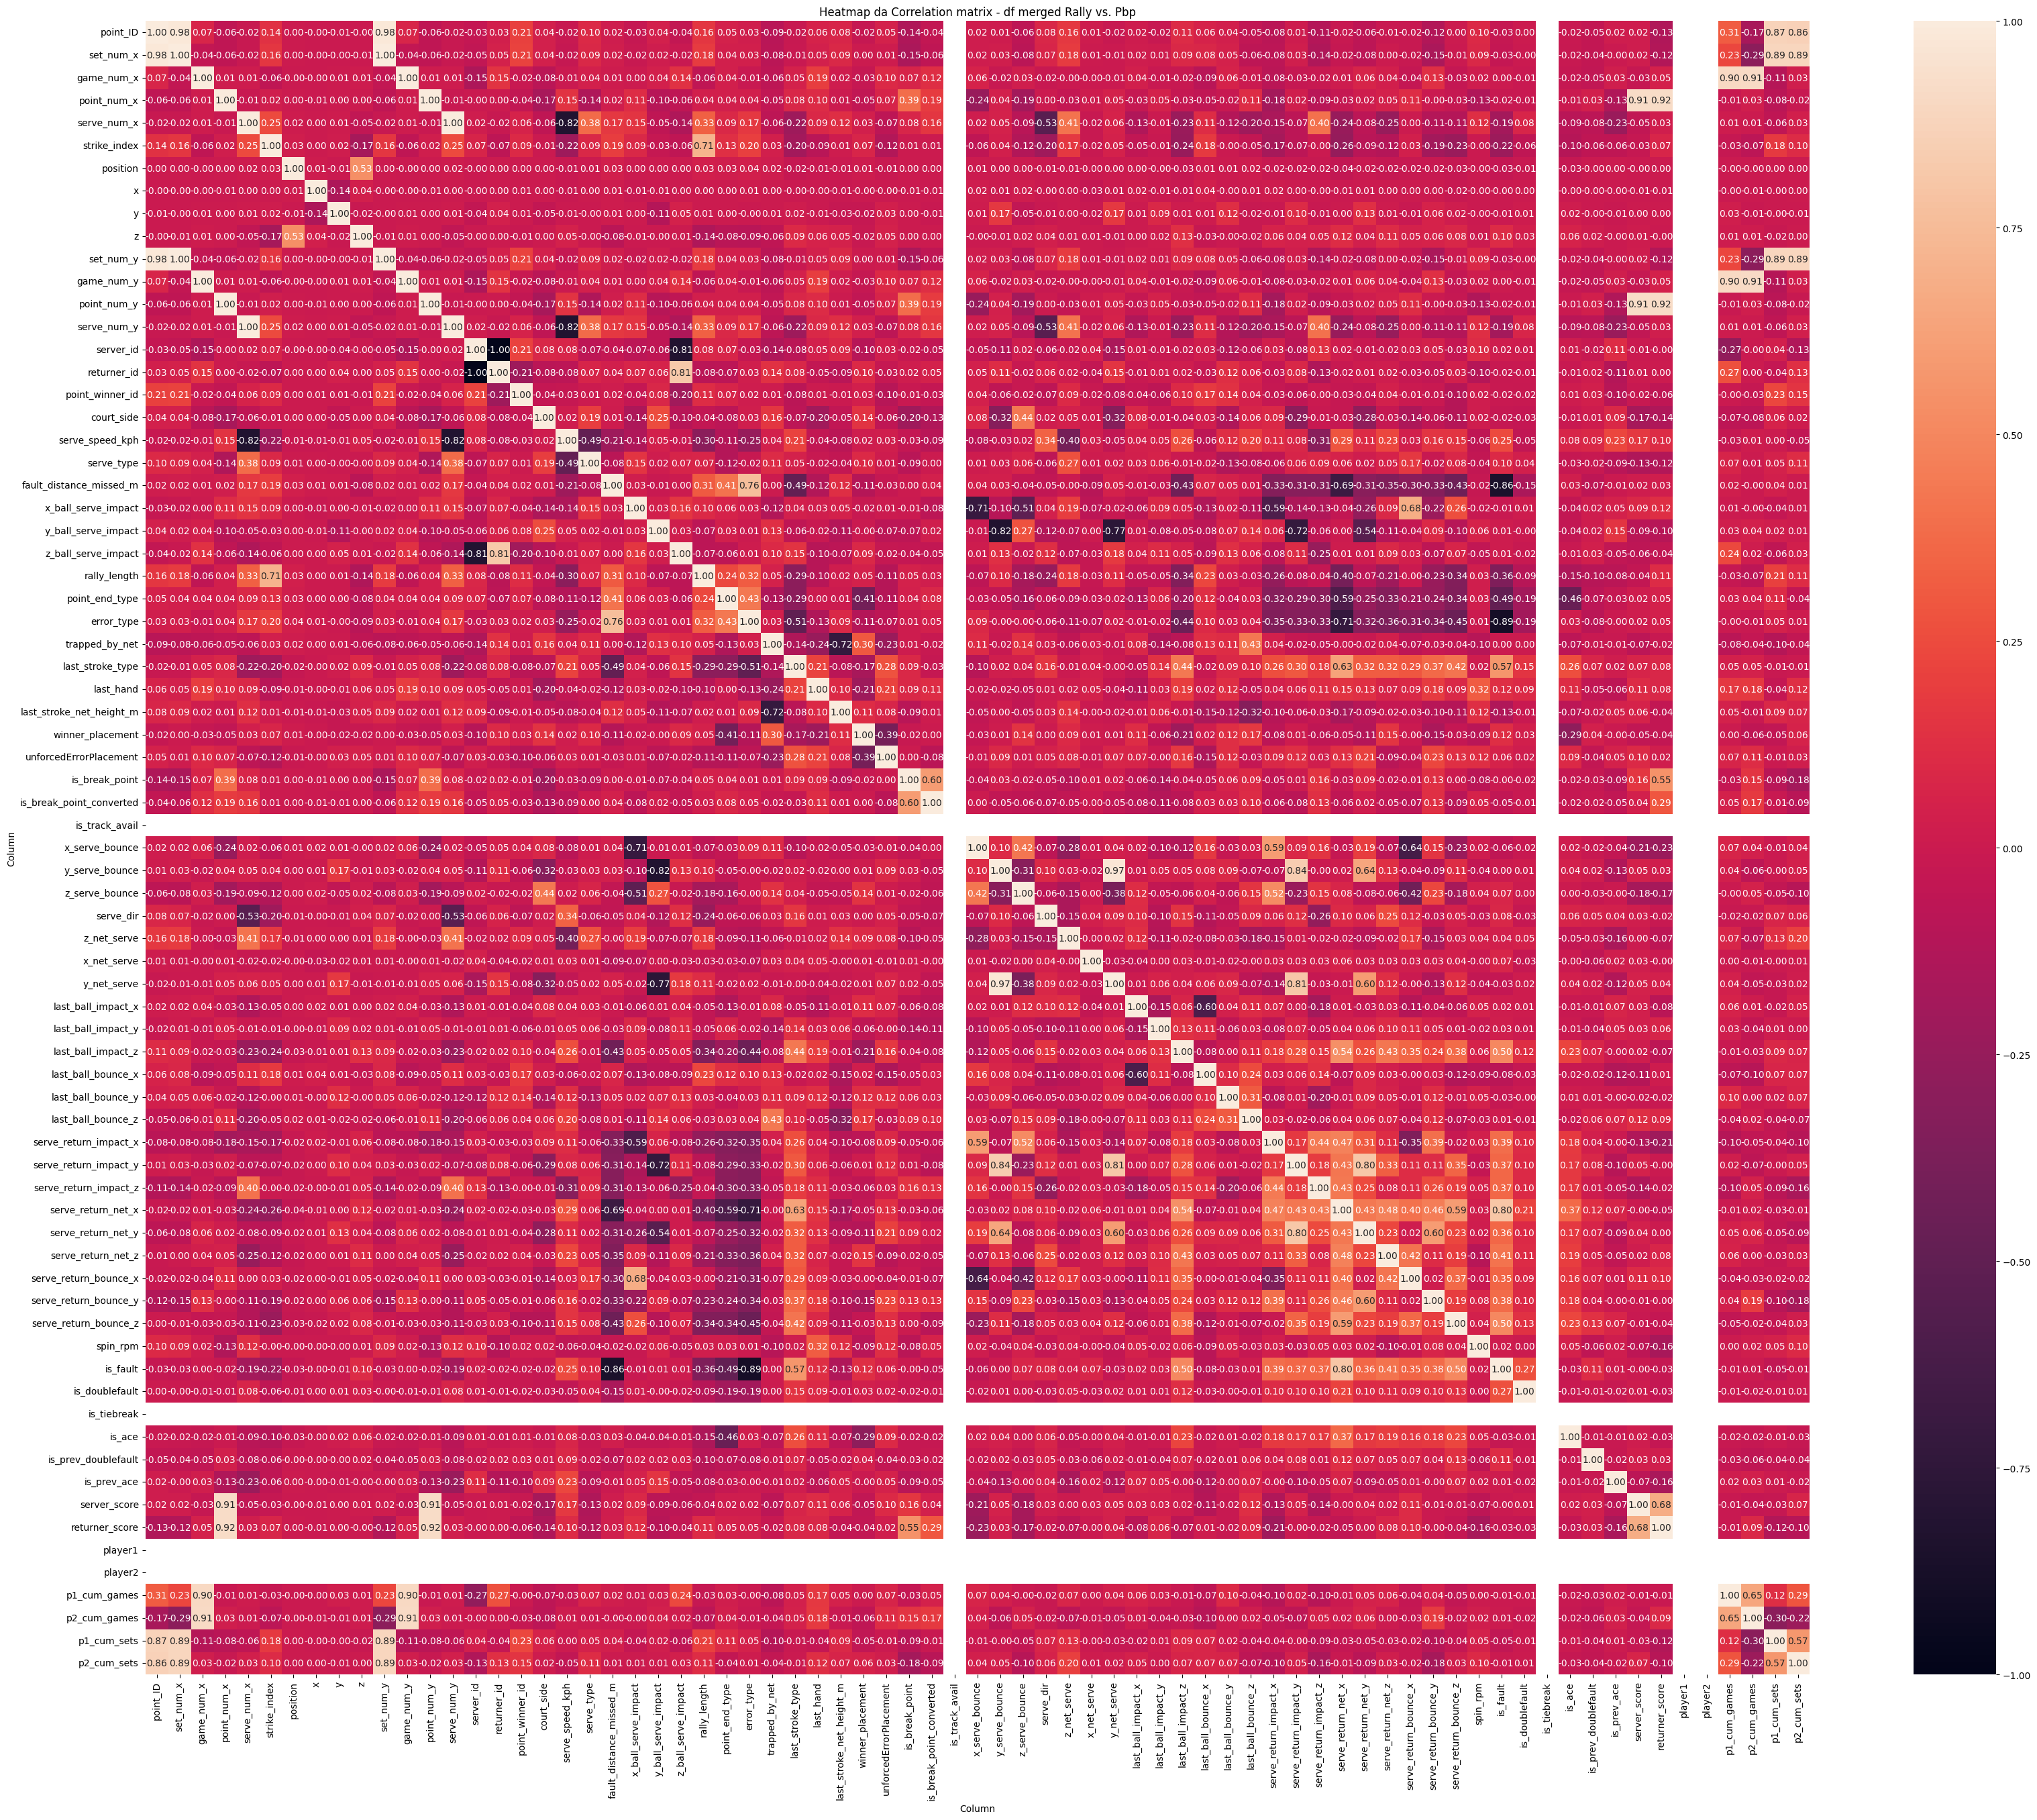

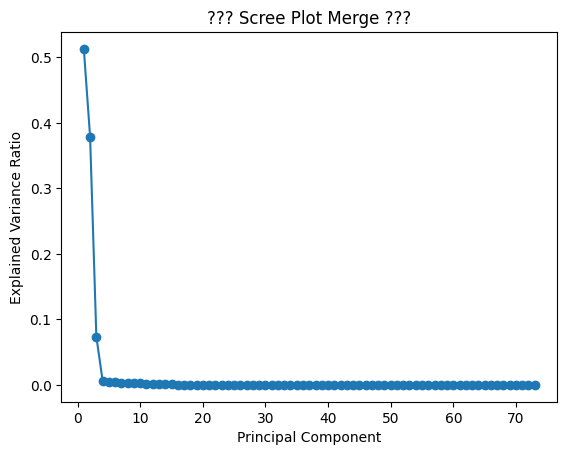

/home/klil/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


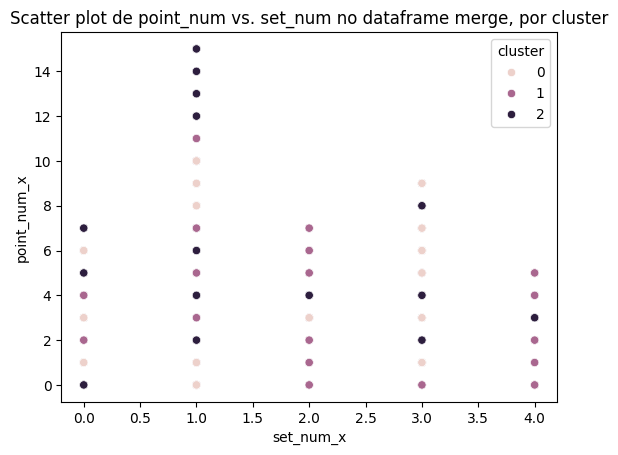

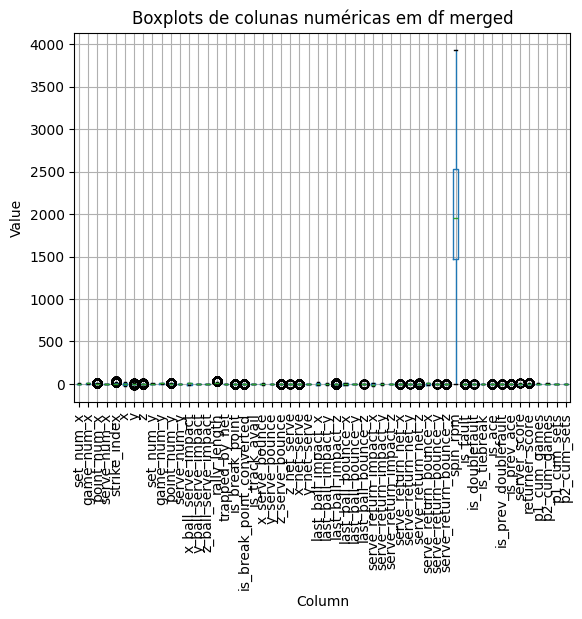

In [9]:
rally_data_merged = rally_data.merge(pbp_data, on='point_ID')

rally_data_merged.describe()

print(rally_data_merged)
rally_data_merged.groupby('position')['point_num_x'].describe()


plt.figure(figsize=(15, 10))
rally_data_merged.hist(color='skyblue', figsize=(14, 12), edgecolor='black',  bins=20, grid=False)
plt.suptitle('Histogramas para Variáveis Numéricas para o dataframe merged ', fontsize=16)
plt.tight_layout()

plt.show()


rally_data_merged.describe(include='object')

rally_data_merged['position'].value_counts().plot(kind='bar')
plt.xlabel('position')
plt.ylabel('Number of points')
plt.title('Bar chart do número de pontos em cada posição para o df merge')
plt.show()

rally_data_merged['position'].value_counts().plot(kind='pie')
plt.xlabel('position')
plt.ylabel('Number of points')
plt.title('Pie chart do número de pontos em cada posição para o df merge')
plt.show()


rally_data_merged.groupby(['set_num_x', 'position']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('set_num_x')
plt.ylabel('Number of points')
plt.title('Bar chart do número de pontos em cada posição para cada set_num_x no df merge')
plt.show()

rally_data_merged.boxplot(column='point_num_x', by=['position', 'set_num_x'])
plt.xlabel('position, set_num_x')
plt.ylabel('point_num_x')
plt.title('Grouped boxplot de point_num_x por posição e set_num_x no df merge')
plt.xticks(rotation=90)

plt.show()

sns.violinplot(data=rally_data_merged, x='position', y='point_num_x', hue='set_num_x')
plt.xlabel('position')
plt.ylabel('point_num_x')
plt.title('Violin plot de point_num_x por posição e set_num_x no df merge')
plt.show()


label_encoder = LabelEncoder()
encoded_data = rally_data_merged.apply(label_encoder.fit_transform)

plt.figure(figsize=(40, 32))
sns.heatmap(encoded_data.corr(), annot=True, fmt='.2f')  # Use '.2f' format for floats
plt.xlabel('Column')
plt.ylabel('Column')
plt.title('Heatmap da Correlation matrix - df merged Rally vs. Pbp')
plt.show()

pca = PCA()
pca.fit(encoded_data)
plt.plot(range(1, len(encoded_data.columns) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('??? Scree Plot Merge ???')
plt.show()

kmeans = KMeans(n_clusters=3)
kmeans.fit(encoded_data)
encoded_data['cluster'] = kmeans.labels_
sns.scatterplot(data=encoded_data, x='set_num_x', y='point_num_x', hue='cluster')
plt.xlabel('set_num_x')
plt.ylabel('point_num_x')
plt.title('Scatter plot de point_num vs. set_num no dataframe merge, por cluster')
plt.show()

rally_data_merged.boxplot()
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Boxplots de colunas numéricas em df merged')
plt.xticks(rotation=90)

plt.show()

In [10]:
## Point by Point (pbp)

In [11]:
print("\nInformações sobre pbp_data:")
print(pbp_data.info())


Informações sobre pbp_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   point_ID                  383 non-null    object 
 1   set_num                   383 non-null    int64  
 2   game_num                  383 non-null    int64  
 3   point_num                 383 non-null    int64  
 4   serve_num                 383 non-null    int64  
 5   server_id                 383 non-null    object 
 6   returner_id               383 non-null    object 
 7   point_winner_id           382 non-null    object 
 8   court_side                383 non-null    object 
 9   serve_speed_kph           383 non-null    object 
 10  serve_type                349 non-null    object 
 11  fault_distance_missed_m   98 non-null     object 
 12  x_ball_serve_impact       383 non-null    float64
 13  y_ball_serve_impact       383 non-nu

In [12]:
# Convert serve string to number
pbp_data["serve_speed_kph"] = pd.to_numeric(pbp_data["serve_speed_kph"].str.replace(" KPH", ""))


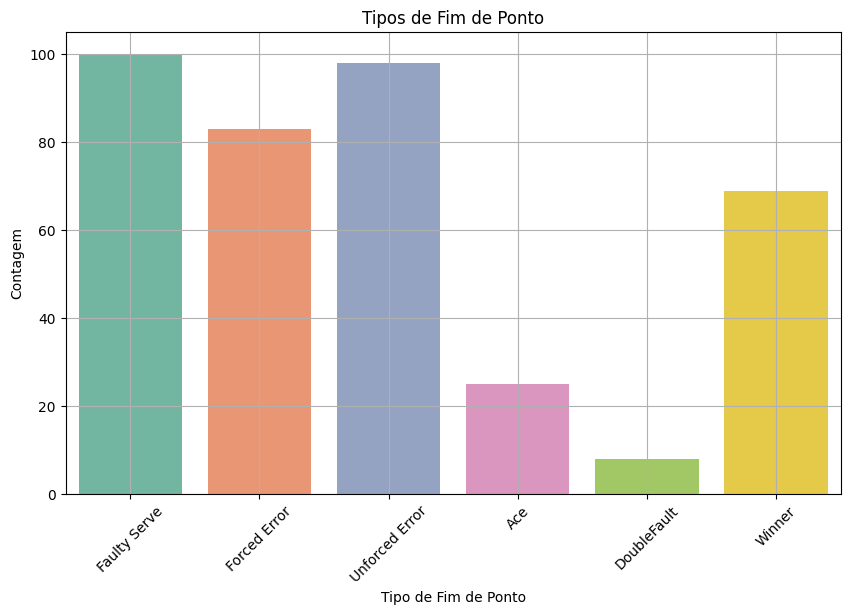

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=pbp_data, x='point_end_type', hue='point_end_type', palette='Set2', legend=False)
plt.title('Tipos de Fim de Ponto')
plt.xlabel('Tipo de Fim de Ponto')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

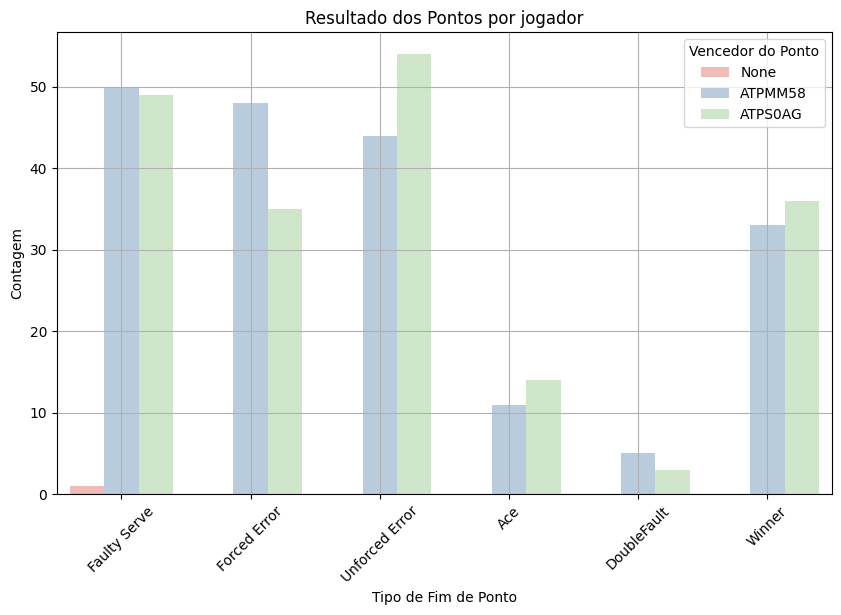

In [40]:
plt.figure(figsize=(10, 6))
pbp_data_results = pbp_data[['point_winner_id', 'error_type', 'point_end_type']].copy()
pbp_data_results['point_end_type'].fillna('Other', inplace=True)  #!!!!!!!!!!!!!!!!!!
pbp_data_results['error_type'].fillna('None', inplace=True) 
pbp_data_results['point_winner_id'].fillna('None', inplace=True) 
sns.countplot(data=pbp_data_results, x='point_end_type', hue='point_winner_id', palette='Pastel1', dodge=True)
plt.title('Resultado dos Pontos por jogador')
plt.xlabel('Tipo de Fim de Ponto')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Vencedor do Ponto')
plt.grid(True)
plt.show()



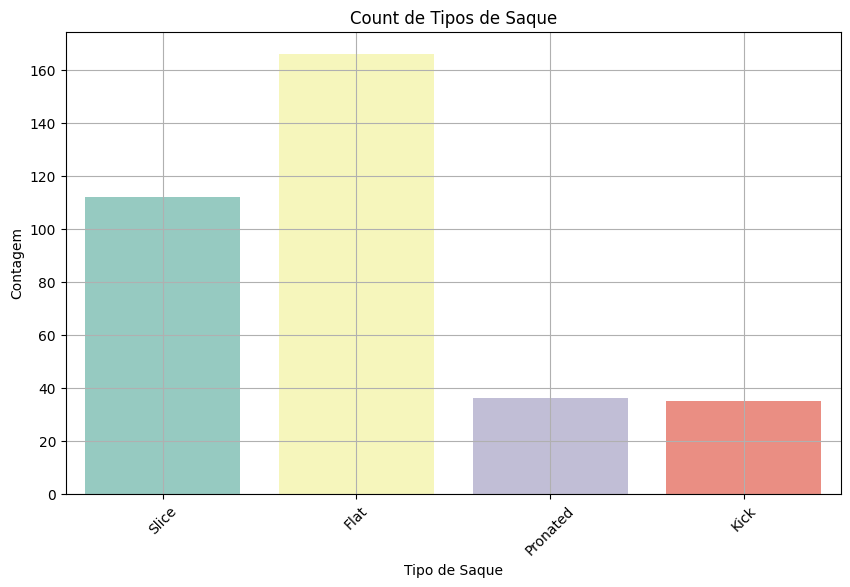

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=pbp_data, x='serve_type', hue='serve_type', palette='Set3', legend=False)
plt.title('Count de Tipos de Saque')
plt.xlabel('Tipo de Saque')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


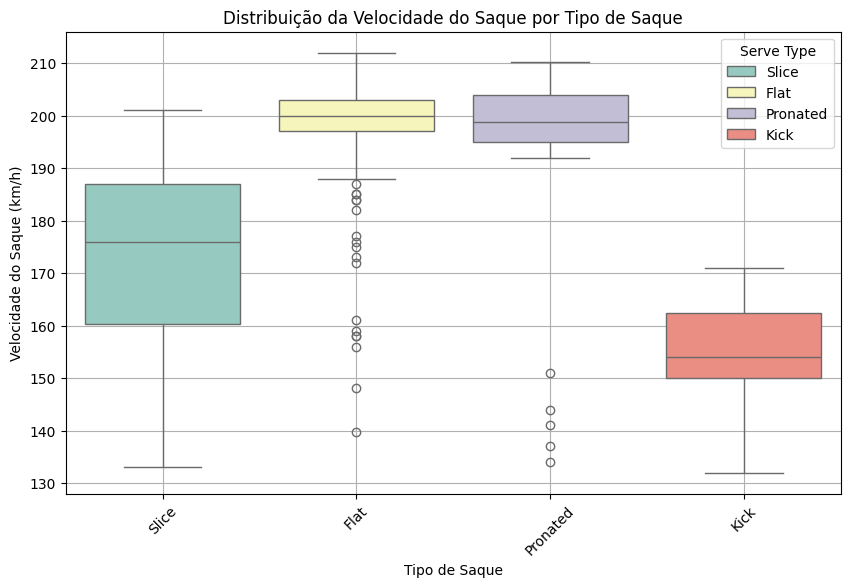

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pbp_data, x='serve_type', y='serve_speed_kph', hue='serve_type', palette='Set3', dodge=False)
plt.title('Distribuição da Velocidade do Saque por Tipo de Saque')
plt.xlabel('Tipo de Saque')
plt.ylabel('Velocidade do Saque (km/h)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title='Serve Type')
plt.show()


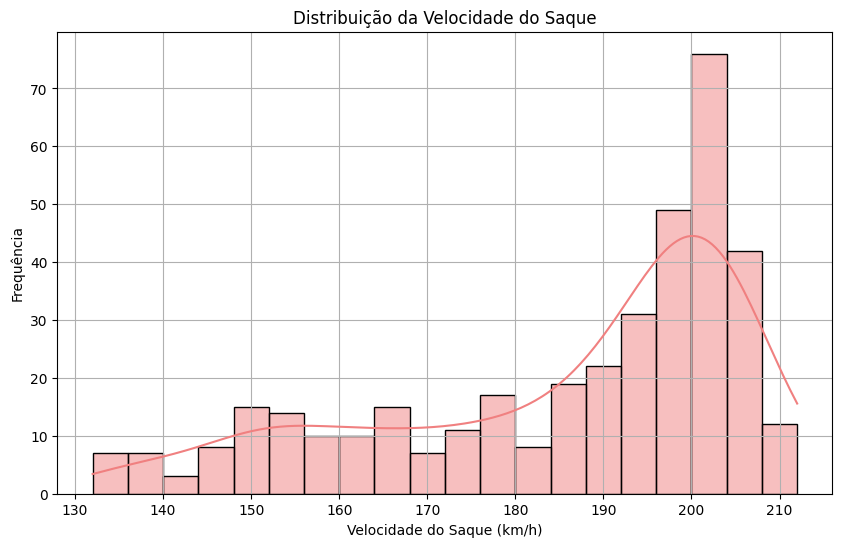

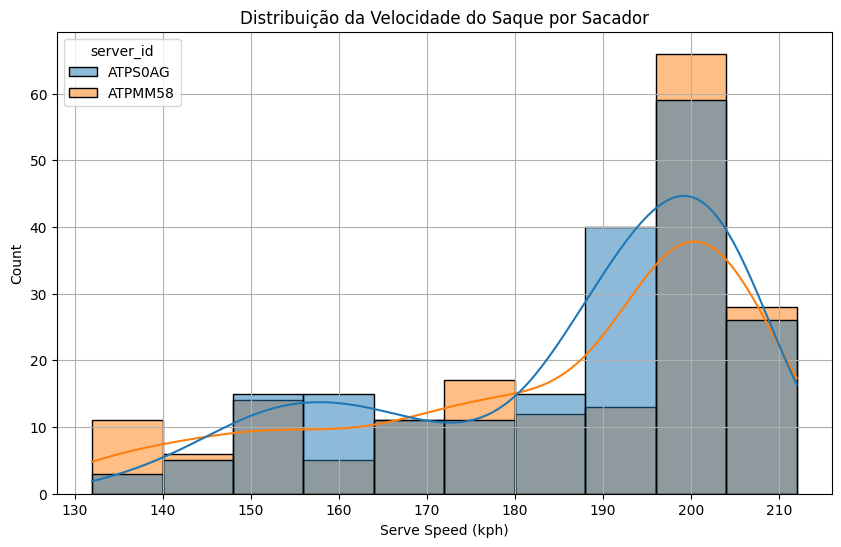

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=pbp_data, x='serve_speed_kph', bins=20, kde=True, color='lightcoral')
plt.title('Distribuição da Velocidade do Saque')
plt.xlabel('Velocidade do Saque (km/h)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# pbp_data["serve_speed_kph"] = pd.to_numeric(pbp_data["serve_speed_kph"].str.replace(" KPH", ""))
plt.figure(figsize=(10, 6))
sns.histplot(data=pbp_data, x="serve_speed_kph", hue="server_id", kde=True)
plt.title("Distribuição da Velocidade do Saque por Sacador")
plt.xlabel("Serve Speed (kph)")
plt.grid(True)
plt.show()


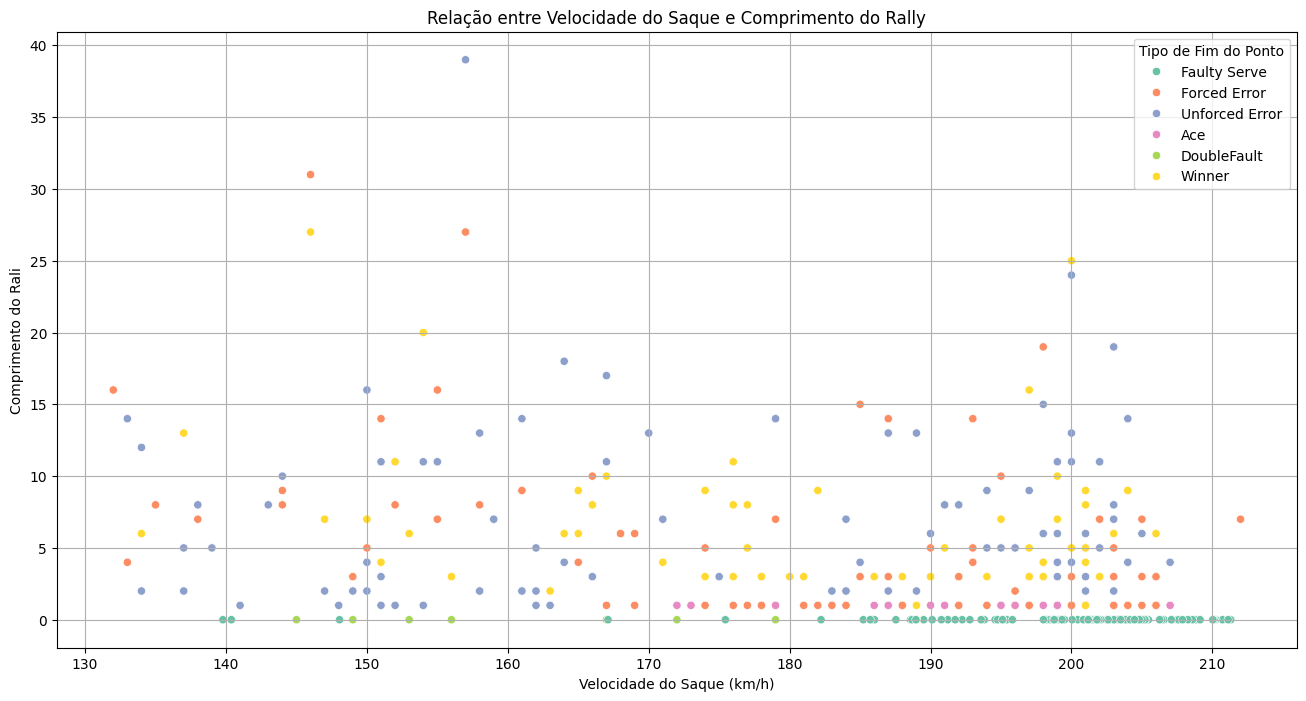

In [18]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='serve_speed_kph', y='rally_length', hue='point_end_type', data=pbp_data, palette='Set2')
plt.title('Relação entre Velocidade do Saque e Comprimento do Rally')
plt.xlabel('Velocidade do Saque (km/h)')
plt.ylabel('Comprimento do Rali')
plt.grid(True)
plt.legend(title='Tipo de Fim do Ponto')
plt.show()

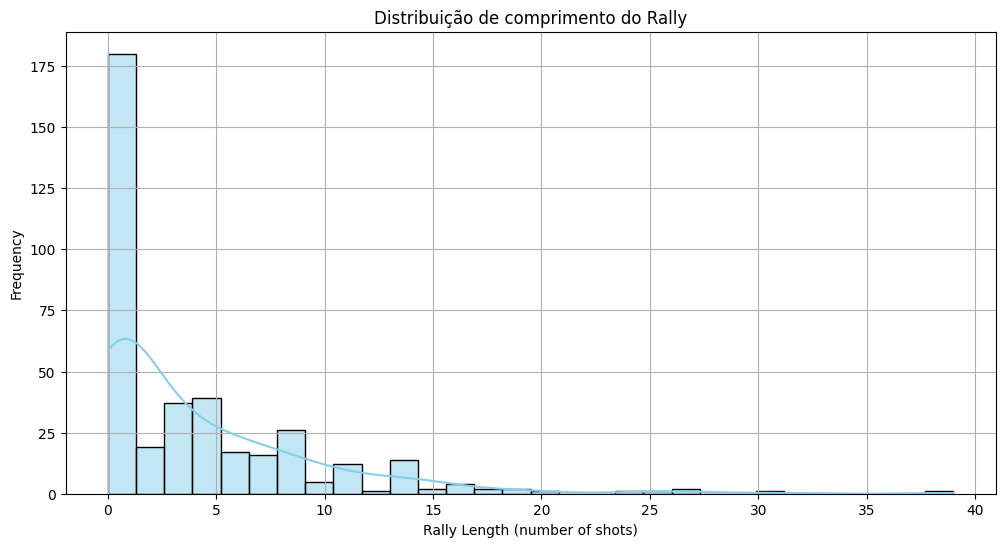

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(pbp_data['rally_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição de comprimento do Rally')
plt.xlabel('Rally Length (number of shots)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

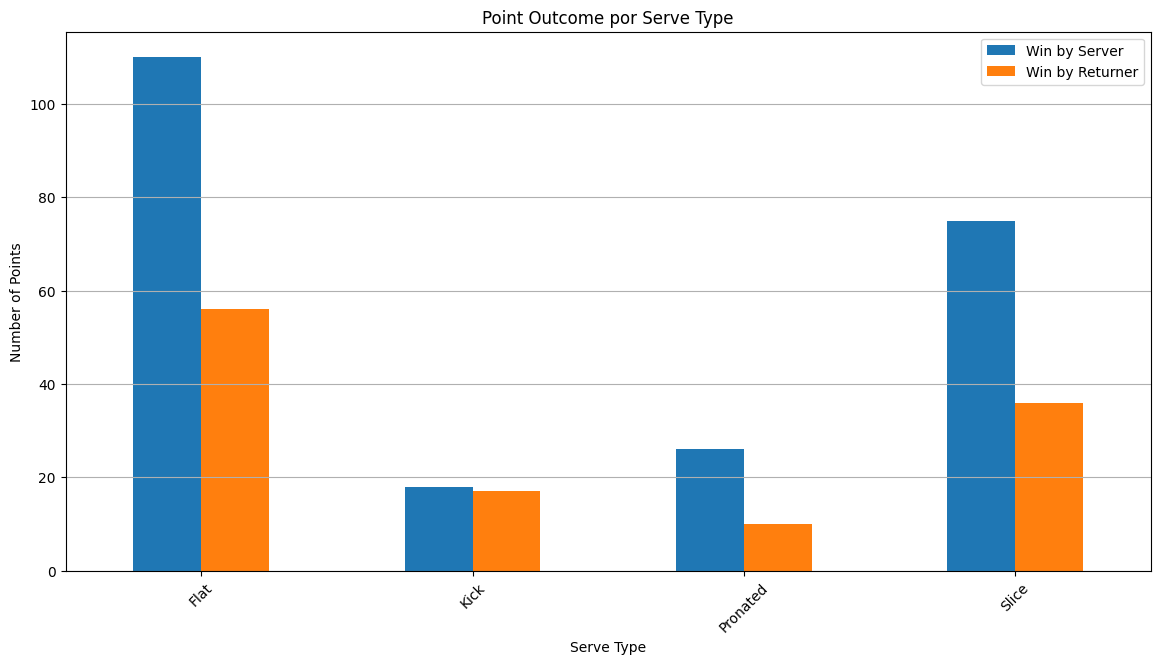

In [20]:
serve_impact_df = pbp_data[pbp_data[['x_ball_serve_impact', 'y_ball_serve_impact']].notnull().all(axis=1)]
serve_bounce_df = pbp_data[pbp_data[['x_serve_bounce', 'y_serve_bounce']].notnull().all(axis=1)]

serve_impact_df.loc[:, ['x_ball_serve_impact', 'y_ball_serve_impact']] = serve_impact_df.loc[:, ['x_ball_serve_impact', 'y_ball_serve_impact']].apply(pd.to_numeric, errors='coerce')
serve_bounce_df.loc[:, ['x_serve_bounce', 'y_serve_bounce']] = serve_bounce_df.loc[:, ['x_serve_bounce', 'y_serve_bounce']].apply(pd.to_numeric, errors='coerce')

serve_type_outcome_df = pbp_data[pbp_data['serve_type'].notnull()]
serve_type_win_by_server = serve_type_outcome_df[serve_type_outcome_df['point_winner_id'] == serve_type_outcome_df['server_id']]['serve_type'].value_counts()
serve_type_win_by_returner = serve_type_outcome_df[serve_type_outcome_df['point_winner_id'] == serve_type_outcome_df['returner_id']]['serve_type'].value_counts()

serve_type_outcomes = pd.DataFrame({'Win by Server': serve_type_win_by_server, 'Win by Returner': serve_type_win_by_returner}).fillna(0)

# sns bug aq matplot melhor
serve_type_outcomes.plot(kind='bar', figsize=(14, 7))
plt.title('Resultado do Ponto (Point Outcome) por Serve Type')
plt.xlabel('Serve Type')
plt.ylabel('Number of Points')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

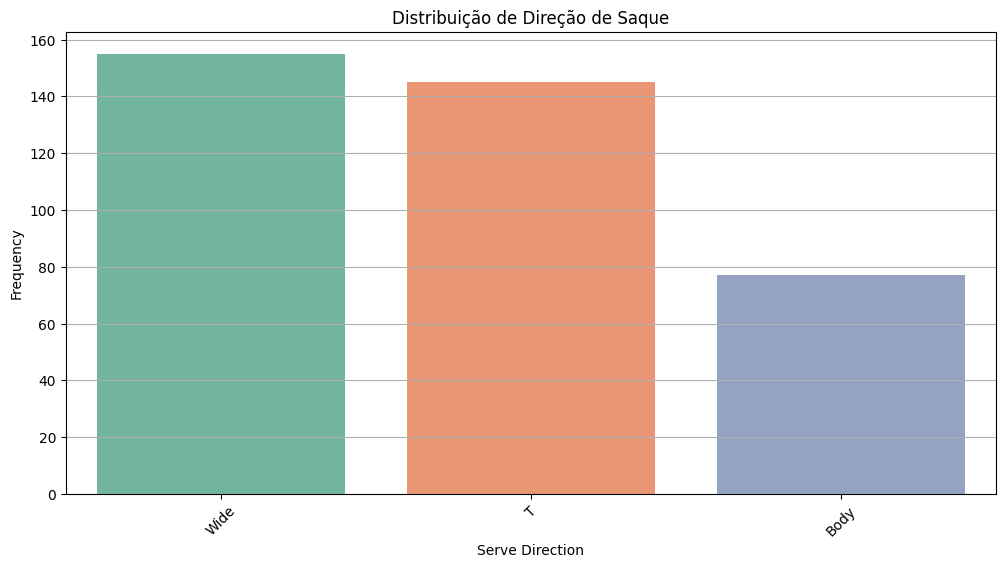

In [21]:
plt.figure(figsize=(12, 6))

serve_direction_counts = pbp_data['serve_dir'].value_counts()
sns.barplot(x=serve_direction_counts.index, y=serve_direction_counts.values, hue=serve_direction_counts.index, palette='Set2', legend=False)
plt.title('Distribuição de Direção de Saque')
plt.xlabel('Serve Direction')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


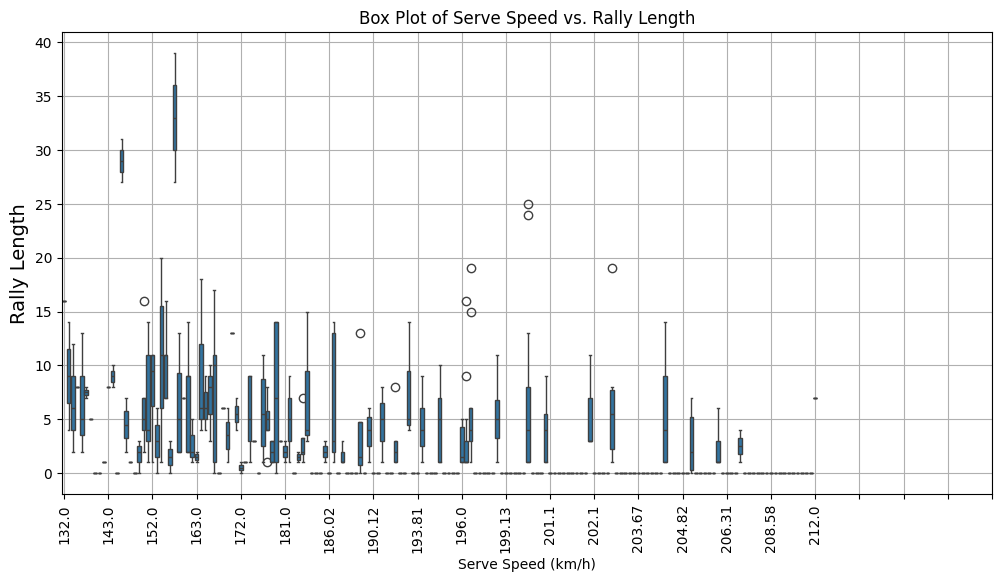

In [22]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='serve_speed_kph', y='rally_length', data=pbp_data)
plt.title('Box Plot of Serve Speed vs. Rally Length')
plt.xlabel('Serve Speed (km/h)')
plt.ylabel('Rally Length', fontsize=14) 
plt.xticks(rotation=90)

# Choose every 10th tick starting from the first one
plt.xticks(range(0, int(pbp_data['serve_speed_kph'].max()) + 1, 10))

plt.grid(True)
plt.show()

In [23]:
## ball_tracking (rally_data) 

Informações sobre rally_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9247 entries, 0 to 9246
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   point_ID      9247 non-null   object 
 1   set_num       9247 non-null   int64  
 2   game_num      9247 non-null   int64  
 3   point_num     9247 non-null   int64  
 4   serve_num     9247 non-null   int64  
 5   strike_index  9247 non-null   int64  
 6   position      9247 non-null   object 
 7   x             9247 non-null   float64
 8   y             9247 non-null   float64
 9   z             9247 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 722.5+ KB
None


<Figure size 1500x1000 with 0 Axes>

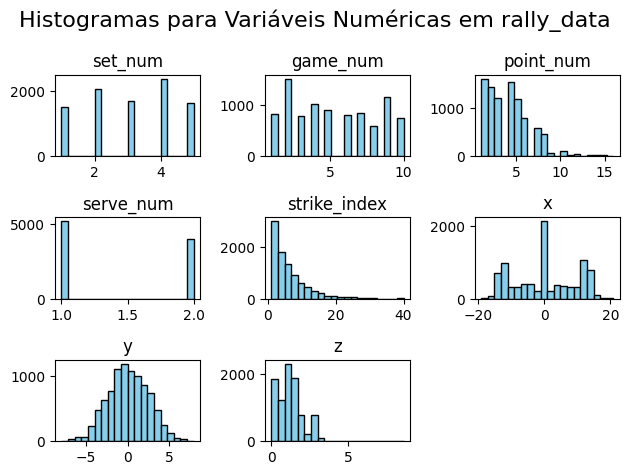

In [24]:
print("Informações sobre rally_data:")
print(rally_data.info())

plt.figure(figsize=(15, 10))
rally_data.hist(color='skyblue', bins=20, edgecolor='black', grid=False)
plt.suptitle('Histogramas para Variáveis Numéricas em rally_data', fontsize=16)
plt.tight_layout()
plt.show()

# rally_data.hist(figsize=(15, 10), color='skyblue')
# plt.show()


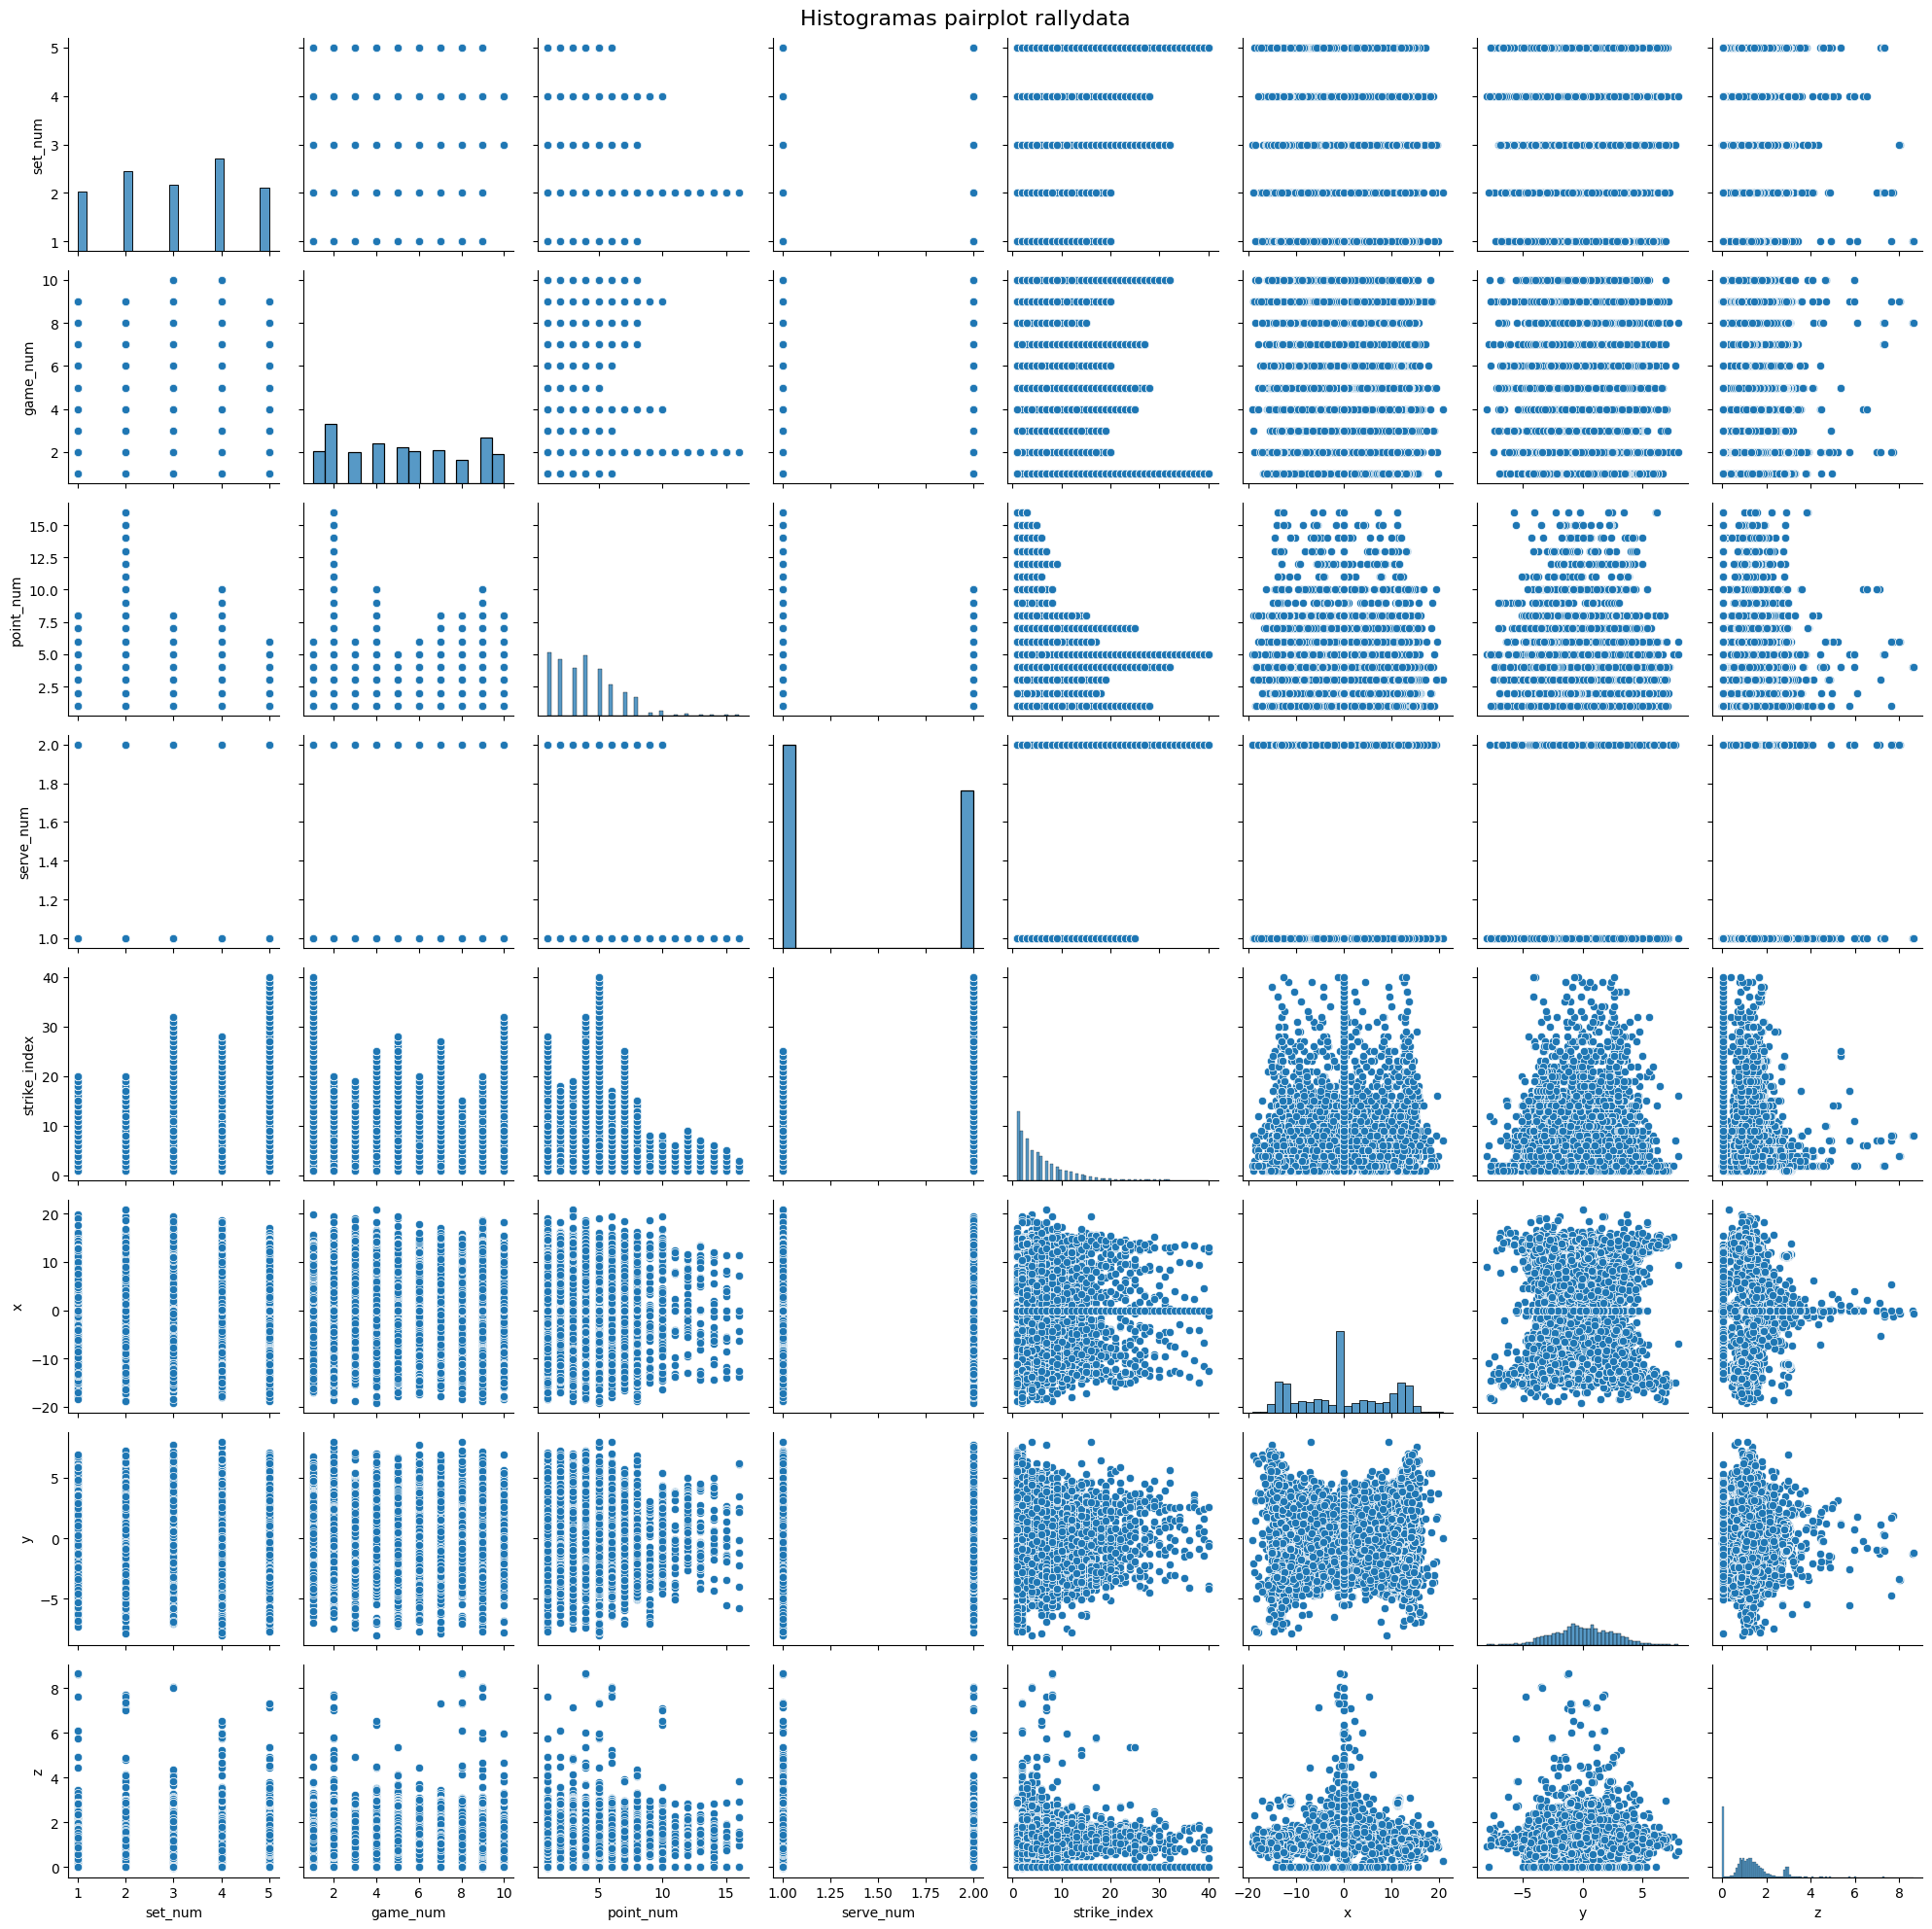

In [25]:
sns.pairplot(rally_data, diag_kind='hist')

plt.suptitle('Histogramas pairplot rallydata', fontsize=16, y=0.99)
plt.tight_layout()

plt.show()

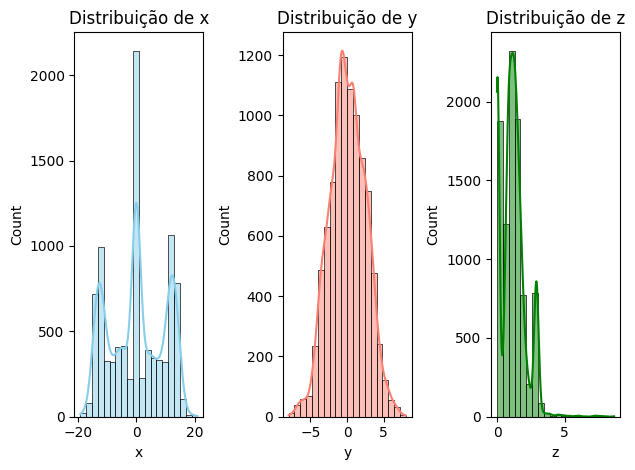

In [26]:
plt.subplot(1, 3, 1)
sns.histplot(rally_data['x'], bins=20, color='skyblue', kde=True)
plt.title('Distribuição de x')

plt.subplot(1, 3, 2)
sns.histplot(rally_data['y'], bins=20, color='salmon', kde=True)
plt.title('Distribuição de y')

plt.subplot(1, 3, 3)
sns.histplot(rally_data['z'], bins=20, color='green', kde=True)
plt.title('Distribuição de z')

plt.tight_layout()
plt.show()


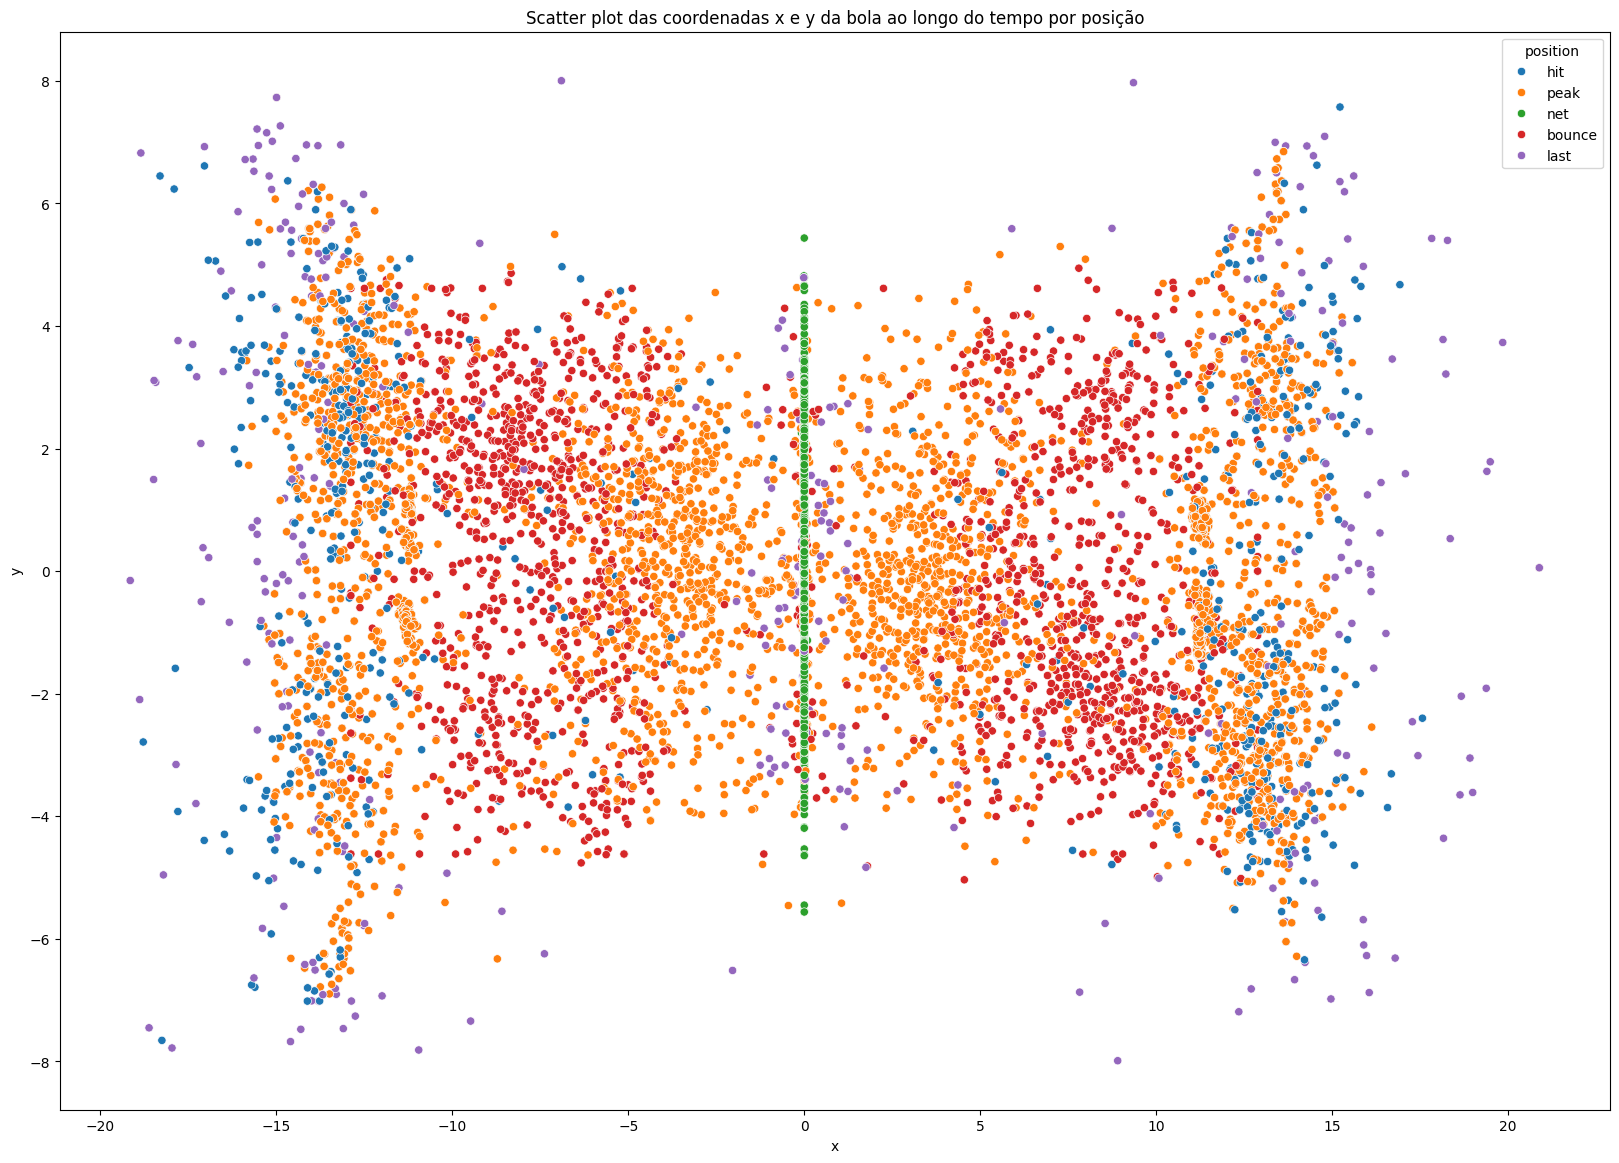

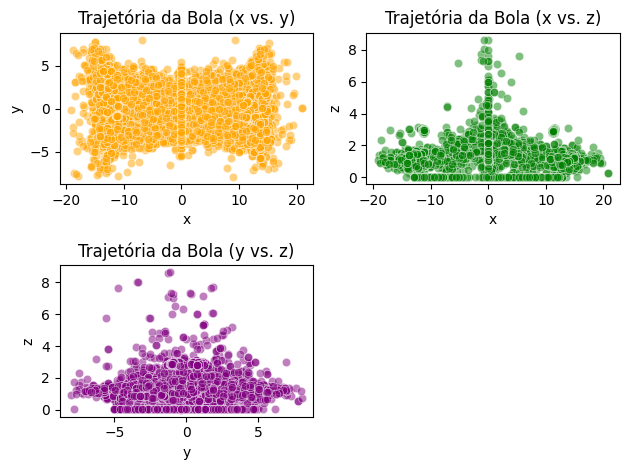

In [27]:
plt.figure(figsize=(20, 14))
sns.scatterplot(data=rally_data, x='x', y='y', hue='position')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot das coordenadas x e y da bola ao longo do tempo por posição')
plt.show()

plt.subplot(2, 2, 1)
sns.scatterplot(data=rally_data, x='x', y='y', color='orange', alpha=0.5)
plt.title('Trajetória da Bola (x vs. y)')

plt.subplot(2, 2, 2)
sns.scatterplot(data=rally_data, x='x', y='z', color='green', alpha=0.5)
plt.title('Trajetória da Bola (x vs. z)')

plt.subplot(2, 2, 3)
sns.scatterplot(data=rally_data, x='y', y='z', color='purple', alpha=0.5)
plt.title('Trajetória da Bola (y vs. z)')

plt.tight_layout()
plt.show()



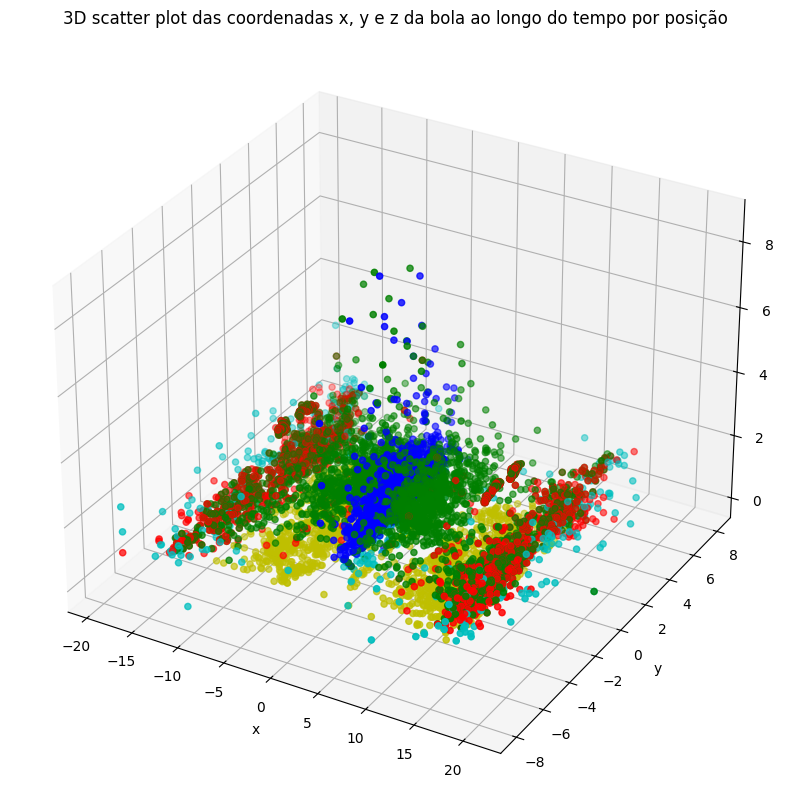

In [28]:
color_map = {'hit': 'r', 'peak': 'g', 'net': 'b', 'bounce': 'y', 'last': 'c'}

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = rally_data['position'].map(color_map)

ax.scatter(rally_data['x'], rally_data['y'], rally_data['z'], c=colors)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D scatter plot das coordenadas x, y e z da bola ao longo do tempo por posição')
plt.show()


In [29]:
# rally_data_grouped = rally_data.groupby('position').mean().reset_index()
# sns.heatmap(rally_data_grouped[['x', 'y', 'z']].mean(numeric_only=True), annot=True)
# plt.xlabel('Time')
# plt.ylabel('Position')
# plt.title('Heatmap of the average x, y, and z coordinates of the ball over time, by position')
# plt.show()

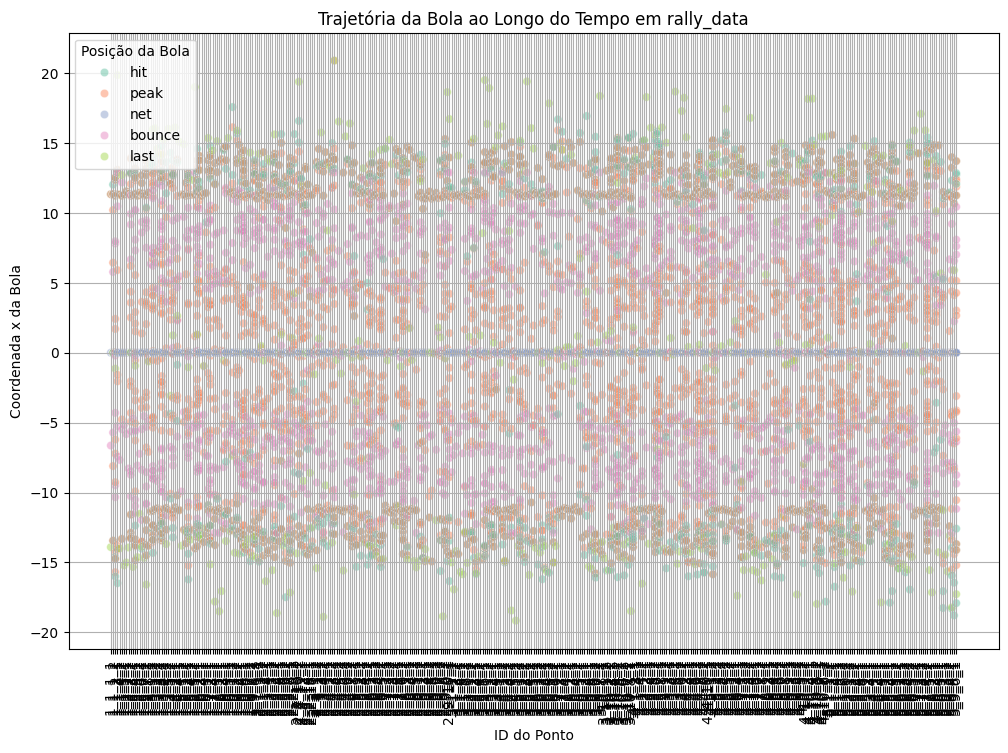

In [30]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rally_data, x='point_ID', y='x', hue='position', palette='Set2', alpha=0.5)
plt.title('Trajetória da Bola ao Longo do Tempo em rally_data')
plt.xlabel('ID do Ponto')
plt.ylabel('Coordenada x da Bola')
plt.xticks(rotation=45)
plt.legend(title='Posição da Bola')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


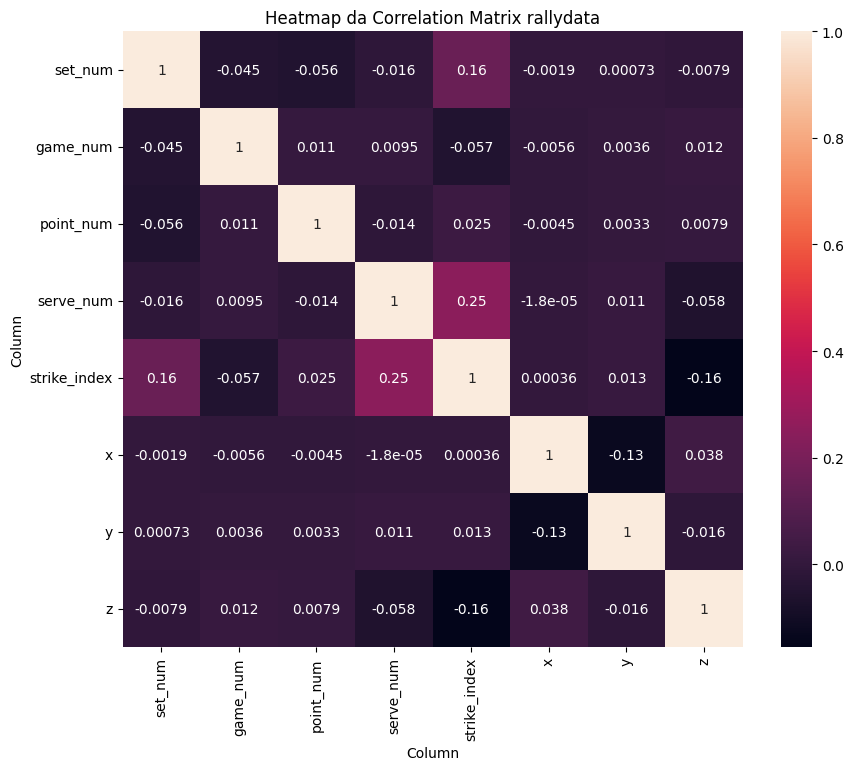

In [31]:
numeric_columns = rally_data.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.xlabel('Column')
plt.ylabel('Column')
plt.title('Heatmap da Correlation Matrix rallydata')
plt.show()


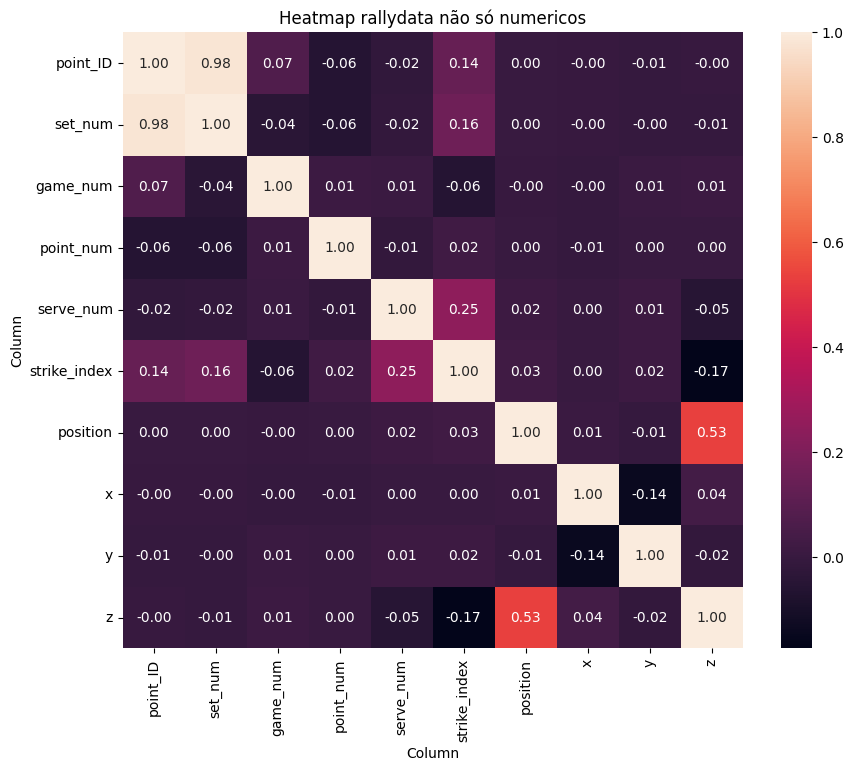

In [32]:
label_encoder = LabelEncoder()
encoded_data = rally_data.apply(label_encoder.fit_transform)

plt.figure(figsize=(10, 8))
sns.heatmap(encoded_data.corr(), annot=True, fmt='.2f')  # Use '.2f' format for floats
plt.xlabel('Column')
plt.ylabel('Column')
plt.title('Heatmap rallydata não só numericos')
plt.show()


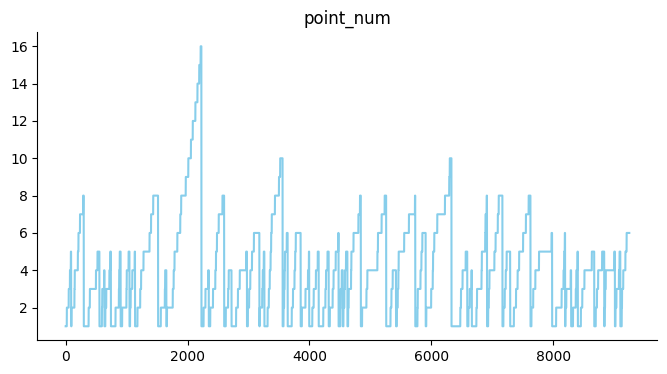

In [33]:

rally_data['point_num'].plot(kind='line', figsize=(8, 4), title='point_num', color='skyblue')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


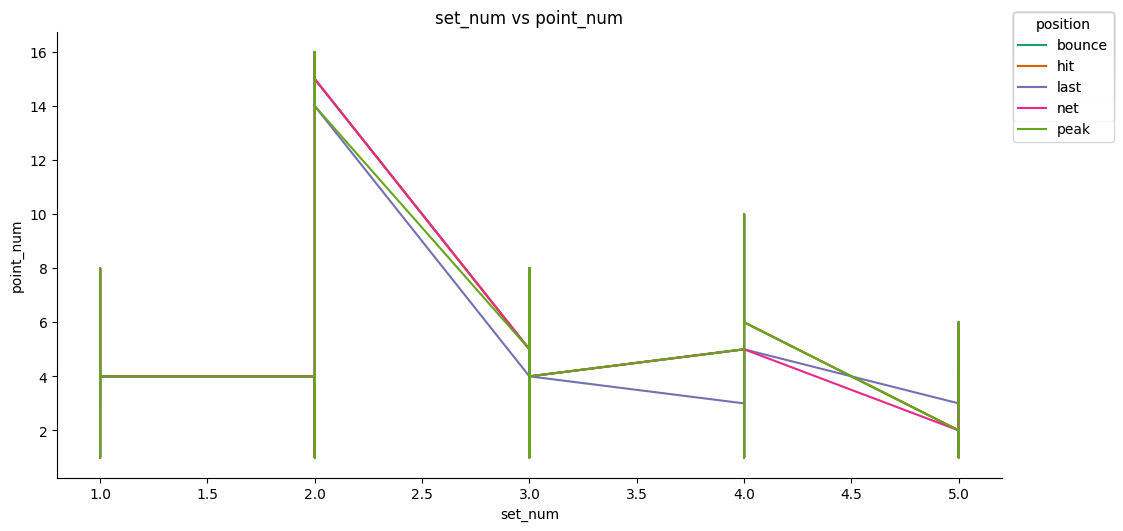

In [36]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['set_num']
  ys = series['point_num']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
rally_data_sorted = rally_data.sort_values('set_num', ascending=True)
for i, (series_name, series) in enumerate(rally_data_sorted.groupby('position')):
  _plot_series(series, series_name, i)
  fig.legend(title='position', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.title('set_num vs point_num')
plt.xlabel('set_num')
_ = plt.ylabel('point_num')
